# Статистика в R - часть третья

*Перед прочтением настоятельно рекомендуем ознакомиться с предыдущими частями данного руководства*

В этой части мы узнаем об одной из самых часто используемых моделей в статистическом анализе - **линейной регрессии**, которая показывает зависимость одной переменной от одного или нескольких факторов. Уравнение линейной регресии выглядит так:

$$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...\beta_{n}x_{n}$$

*Бета* - это параметры (коэффициенты) регрессии, *x* - регрессоры (факторы) модели, *n* - количество факторов модели.

Строить модели линейной регрессии будем по датасету **diamonds** из библотеки **yarrr**. Датасет содержит информацию по 150 алмазам (вес, чистота, цвет и стоимость).

In [2]:
# install.packages('yarrr')         # Для работы с датасетом установите библиотеку 'yarrr'

package 'yarrr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpG6CJAk\downloaded_packages


In [3]:
library(yarrr)
head(diamonds)

Warning message:
"package 'yarrr' was built under R version 3.6.3"Loading required package: jpeg
Loading required package: BayesFactor
Warning message:
"package 'BayesFactor' was built under R version 3.6.3"Loading required package: coda
Warning message:
"package 'coda' was built under R version 3.6.3"Loading required package: Matrix
************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************
Loading required package: circlize
Warning message:
"package 'circlize' was built under R version 3.6.3"========================================
circlize version 0.4.10
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This me

weight,clarity,color,value
9.35,0.88,4,182.5
11.10,1.05,5,191.2
8.65,0.85,6,175.7
10.43,1.15,5,195.2
10.62,0.92,5,181.6
12.35,0.44,4,182.9


Построим линейную модель, которую мы можем использовать для оценки *стоимости* каждого алмаза, как линейной комбинации трех независимых переменных: его *веса*, *чистоты* и *цвета*:

$$\beta_{Int} + \beta_{weight} \times weight + \beta_{clarity} \times clarity + \beta_{color} \times color$$

**Обратите внимание:** данную линейную модель мы строим на данных с **нормальным распределением**.

In [4]:
# Строим модель с зависимой переменной value и 3-мя независимыми: weight, clarity, color
diamonds.lm <- lm(formula = value ~ weight + clarity + color,
                  data = diamonds)

In [5]:
summary(diamonds.lm)   # Вывод результатов - через summary


Call:
lm(formula = value ~ weight + clarity + color, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4046  -3.5473  -0.1134   3.2552  11.0464 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 148.3354     3.6253  40.917   <2e-16 ***
weight        2.1894     0.2000  10.948   <2e-16 ***
clarity      21.6922     2.1429  10.123   <2e-16 ***
color        -0.4549     0.3646  -1.248    0.214    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.672 on 146 degrees of freedom
Multiple R-squared:  0.6373,	Adjusted R-squared:  0.6298 
F-statistic: 85.49 on 3 and 146 DF,  p-value: < 2.2e-16


Нас интересует колонка **Estimate**, содержимое которой - коэффициенты для уравнения нашей линейной регрессии. Подставте их в уравнение и вы получите модель для оценки стоимости алмазов.

С помощью линейной модели вы можете предсказывать значения зависимой переменной (в нашем случае - стоимость алмазов) через параметр **fitted.values**.

In [6]:
# Получаем предсказанные значения и записываем в новый столбик исходной таблицы
diamonds$value.lm <- diamonds.lm$fitted.values 

In [7]:
head(diamonds)

weight,clarity,color,value,value.lm
9.35,0.88,4,182.5,186.0758
11.10,1.05,5,191.2,193.1401
8.65,0.85,6,175.7,182.9826
10.43,1.15,5,195.2,193.8424
10.62,0.92,5,181.6,189.2692
12.35,0.44,4,182.9,183.0995


Последний столбик: **предсказанные** значения стоимости алмаза, исходя из его веса, чистоты и цвета, а предпоследний столбик - **реальные** значения. Для наглядного отображения можно построить график:

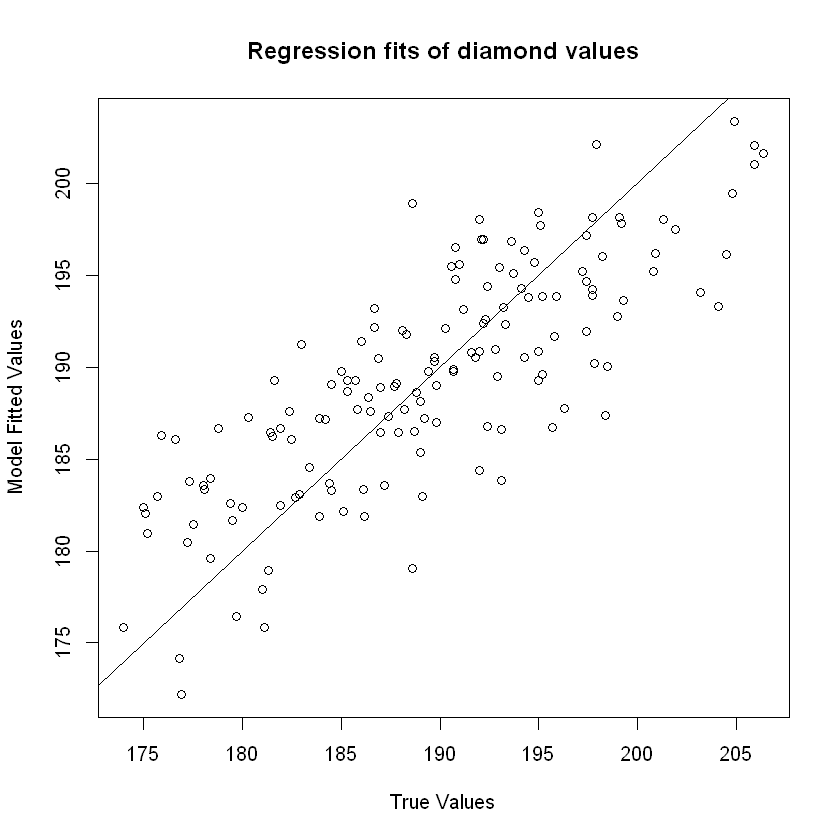

In [8]:
plot(x = diamonds$value,                          
     y = diamonds.lm$fitted.values,
     xlab = "True Values",
     ylab = "Model Fitted Values",
     main = "Regression fits of diamond values")

abline(b = 1, a = 0)       # Линия около которой должны располагаться предсказанные значения

Попробуем предсказать значения стоимости новых алмазов по новым данным. Создадим таблицу:

In [9]:
new.weights <- c(10, 20, 15)
new.clarity <- c(1.5, 5.0, 0.2)
new.color <- c(5, 2, 3)

new.diamonds <- data.frame("weight" = new.weights, "clarity" = new.clarity, "color" = new.color)

In [10]:
head(new.diamonds)

weight,clarity,color
10,1.5,5
20,5.0,2
15,0.2,3


In [11]:
predict(object = diamonds.lm,     # Модель регрессии с предсказанными значениями
        newdata = new.diamonds) 

1        2        3 
200.4932 299.6748 184.1503

Чтобы включить условия взаимодействия\* в регрессионную модель, проведите операцию **центрирования независимых переменных** и добавьте их в формулу.

\* *Условия взаимодействия между переменными проверяют, зависит ли влияние одной переменной от другой*

In [12]:
diamonds$weight.c <- diamonds$weight - mean(diamonds$weight)
diamonds$clarity.c <- diamonds$clarity - mean(diamonds$clarity)

# Create a regression model with interactions of centered variables
diamonds.int.lm <- lm(formula = value ~ weight.c * clarity.c,
                      data = diamonds)

In [13]:
summary(diamonds.int.lm)$coefficients # Показ только коэффициентов

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),189.401518,0.3830999,494.392034,2.907642e-237
weight.c,2.222877,0.1987610,11.183671,2.322231e-21
clarity.c,22.248309,2.1338360,10.426438,2.271834e-19
weight.c:clarity.c,1.244697,1.0551311,1.179661,2.400537e-01


Если у вас есть линейная регрессионная модель, то вы можете вывести ее результаты в табличке **ANOVA**:

In [15]:
diamonds.aov <- aov(diamonds.lm)
summary(diamonds.aov)

             Df Sum Sq Mean Sq F value Pr(>F)    
weight        1   3218    3218 147.397 <2e-16 ***
clarity       1   2347    2347 107.531 <2e-16 ***
color         1     34      34   1.557  0.214    
Residuals   146   3187      22                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Сравнение регрессионных моделей с помощью ANOVA

Допустим, вы построили две регрессионные модели - простую и сложную\* - но не можете решить какая из них лучше. Для сравнения качества (уровня значимости) моделей используется знакомая нам функция **anova()**. 

\* *Сложность модели зависит от количества независимых переменных, включенных в нее*

Если **p-value** в результате сравнения окажется **менее 0,05** => **сложная модель лучше**
<br>В противном случае отдавайте предпочтение простой модели.

Построим 3 модели линейной регрессии с разным количеством независимых переменных и сравним их качество:

In [20]:
# Модель 1: только вес
diamonds.mod1 <- lm(value ~ weight, data = diamonds)

# Модель 2: вес и чистота
diamonds.mod2 <- lm(value ~ weight + clarity, data = diamonds)

# Модель 3: вес, чистота и цвет
diamonds.mod3 <- lm(value ~ weight + clarity + color, data = diamonds)

In [23]:
anova(diamonds.mod1, diamonds.mod2)      # Сравнение моделей 1 и 2

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
148,5568.748,NA,NA,NA,NA
147,3221.273,1,2347.475,107.125,3.373243e-19


P-value оказалась маленькой => добавление в модель параметра "чистота алмаза" *улучшило* качество исходной модели.

In [25]:
anova(diamonds.mod2, diamonds.mod3)      # Сравнение моделей 2 и 3

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
147,3221.273,NA,NA,NA,NA
146,3187.282,1,33.99118,1.557036,0.2140973


P-value = 0.2 => добавление параметра "цвет алмаза" *ухудшило* качество модели. Значит наиболее качественная модель - *вторая*.

Также можно сравнивать модели отличающиеся более чем по 1 параметру, к примеру, сравним модели 1 и 3:

In [26]:
anova(diamonds.mod1, diamonds.mod3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
148,5568.748,NA,NA,NA,NA
146,3187.282,2,2381.467,54.54399,2.038865e-18


Как видите, модель 3 оказывается *лучше*, чем 1 (но не лучше модели 2, что мы выяснили ранее).

# Регрессионные модели на данных *без* нормального распределения

Функцию *lm()* используют только на данных с нормальным распределением. Если у ваших данных распределение иное, то вам понадобится функция *glm()*, которая построит **обобщенную линейную модель**.

В параметрах функции вы можете выбрать тип распределения ваших данных:

|family name|тип распределения|
|---|---|
|"binomial"|Биноминальное распределение - подходит если у данных значения 0 и 1|
|"gaussian"|Гауссово (нормальное) распределение - вывод как у функции lm()|
|"Gamma"|Гамма-распределение - подходит для искаженных данных|
|"inverse.gaussian"|Обратно-гауссовская регрессия - смещенное нормальное распределение|
|"poisson"|Распределение Пуассона - подходит для подсчета данных|

Построим биноминальное распределение на датасете с алмазами, но сначала добавим некоторый бинарный параметр *value.g190*, показывающий *больше ли стоимость алмаза чем 190 или нет*.

In [27]:
diamonds$value.g190 <- diamonds$value > 190     # Параметр добавлен

In [28]:
diamond.glm <- glm(formula = value.g190 ~ weight + clarity + color,     # Строим модель биноминального распределения
                   data = diamonds,
                   family = binomial)

In [29]:
summary(diamond.glm)$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-18.8009011,3.4634258,-5.428412,5.685775e-08
weight,1.1251118,0.1968203,5.716441,1.087783e-08
clarity,9.2909721,1.9629068,4.733272,2.209289e-06
color,-0.3836406,0.2480698,-1.546503,1.219832e-01


Так же как и в случае линейной регрессии мы можем предсказать значения через *fitted.values*:

In [30]:
diamonds$pred.g190 <- diamond.glm$fitted.values

In [31]:
head(diamonds[c("weight", "clarity", "color", "value", "pred.g190")])

weight,clarity,color,value,pred.g190
9.35,0.88,4,182.5,0.16251772
11.10,1.05,5,191.2,0.82129665
8.65,0.85,6,175.7,0.03008442
10.43,1.15,5,195.2,0.84559083
10.62,0.92,5,181.6,0.44454833
12.35,0.44,4,182.9,0.08688269


Результат последней колонки показывает вероятность, с которой алмаз имеет стоимость выше 190. 

Предсказывать новые значения по такой модели тоже можно, воспользуемся построенной нами ранее таблицей *new.diamonds* и посчитаем вероятность того, что стоимость алмаза выше 190:

In [41]:
logit.predictions <- predict(object = diamond.glm,    # Рассчитываем logit.predictions (пока это не вероятности)
                             newdata = new.diamonds)

In [38]:
head(logit.predictions)

1         2         3 
 4.468472 49.388913 -1.216952

In [35]:
prob.predictions <- 1 / (1 + exp(-logit.predictions))   # Преобразуем logit.predictions в вероятности 

In [37]:
prob.predictions      # Вывод результата

1         2         3 
0.9886651 1.0000000 0.2284733

С вероятностью в **98%** первый алмаз имеет стоимость выше 190, **100%** у второго алмаза и **22%** у третьего.

Линию регрессии легко добавить на график распределения через abline():

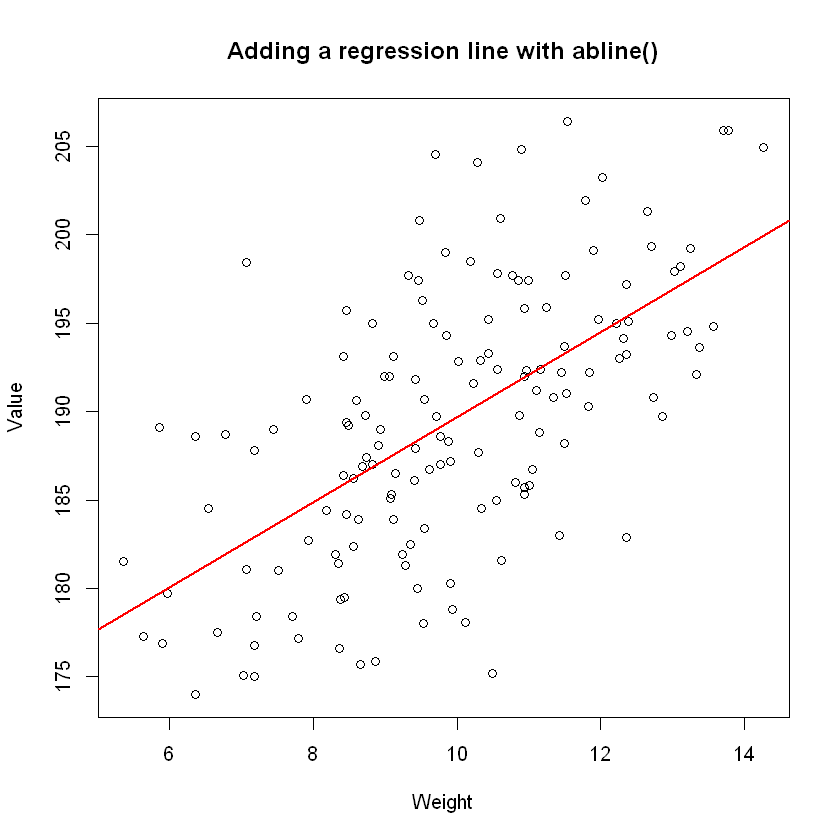

In [40]:
plot(x = diamonds$weight,
     y = diamonds$value,
     xlab = "Weight",
     ylab = "Value",
     main = "Adding a regression line with abline()")

diamonds.lm <- lm(formula = value ~ weight,
                  data = diamonds)

abline(diamonds.lm,
       col = "red", lwd = 2)

# Преображение искаженных данных к виду стандартной регрессии

Под искаженными данными будем понимать такие, что не имеют нормального распределения. Но это можно исправить!

Взглянем на датасет **movies** из библиотеки 'yarr'.

In [49]:
head(movies)   # Не забудьте подключить library(yarrr) (мы это уже сделали в самом начале)

name,rating,genre,creative.type,time,year,production.method,sequel,budget,revenue.all,revenue.dom,revenue.int,revenue.inf
Avatar,PG-13,Action,Science Fiction,162,2009,Animation/Live Action,0,425,2783.919,760.5076,2023.411,826.1981
Titanic,PG-13,Thriller/Suspense,Historical Fiction,194,1997,Live Action,0,200,2207.616,658.6723,1548.943,1139.1828
Jurassic World,PG-13,Action,Science Fiction,124,2015,Live Action,1,215,1665.444,651.4436,1014.000,651.4436
The Avengers,PG-13,Adventure,Super Hero,143,2012,Animation/Live Action,0,225,1519.480,623.2795,896.200,655.3831
Furious 7,PG-13,Action,Contemporary Fiction,137,2014,Live Action,1,190,1516.247,351.0329,1165.214,351.0329
The Avengers: Age of Ultron,PG-13,Action,Super Hero,141,2015,Live Action,1,250,1404.706,459.0059,945.700,459.0059


Допустим, что мы захотели посмотреть распределение кассовых сборов фильмов. Построим гистограмму, чтобы увидеть какое распределение на данный момент имеют наши данные.

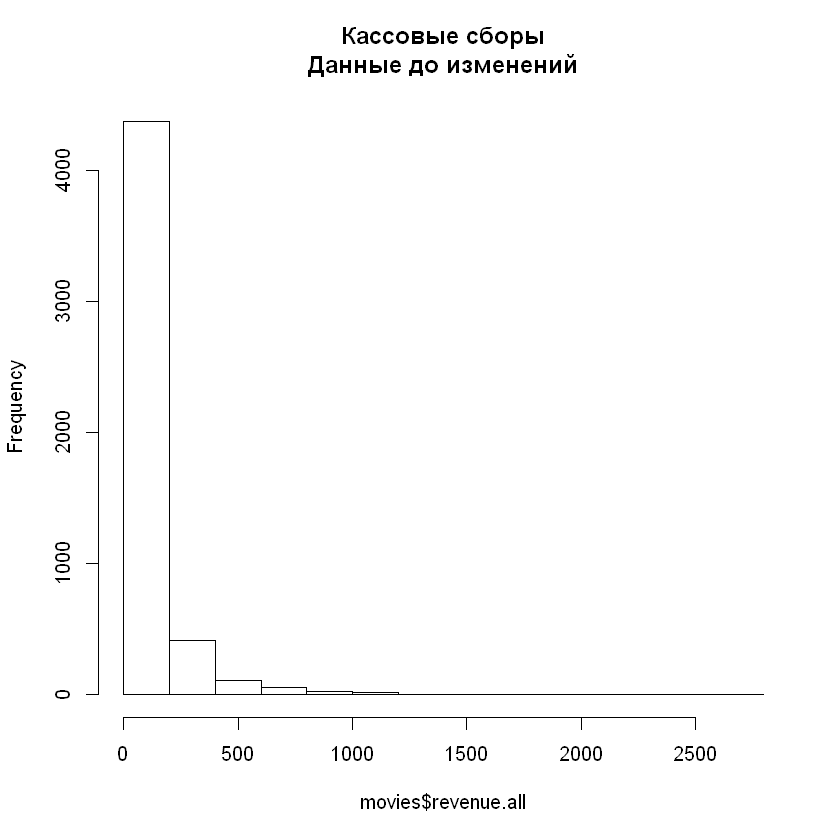

In [56]:
hist(movies$revenue.all, 
     main = "Кассовые сборы\nДанные до изменений")

Распределение явно не является нормальным - чтобы это исправить **прологарифмируем** данные по кассовым сборам. Такой подход является стандартным при нормализации данных.

In [57]:
movies$revenue.all.log <- log(movies$revenue.all)    # Добавим новую переменную с прологарифмированными значениями

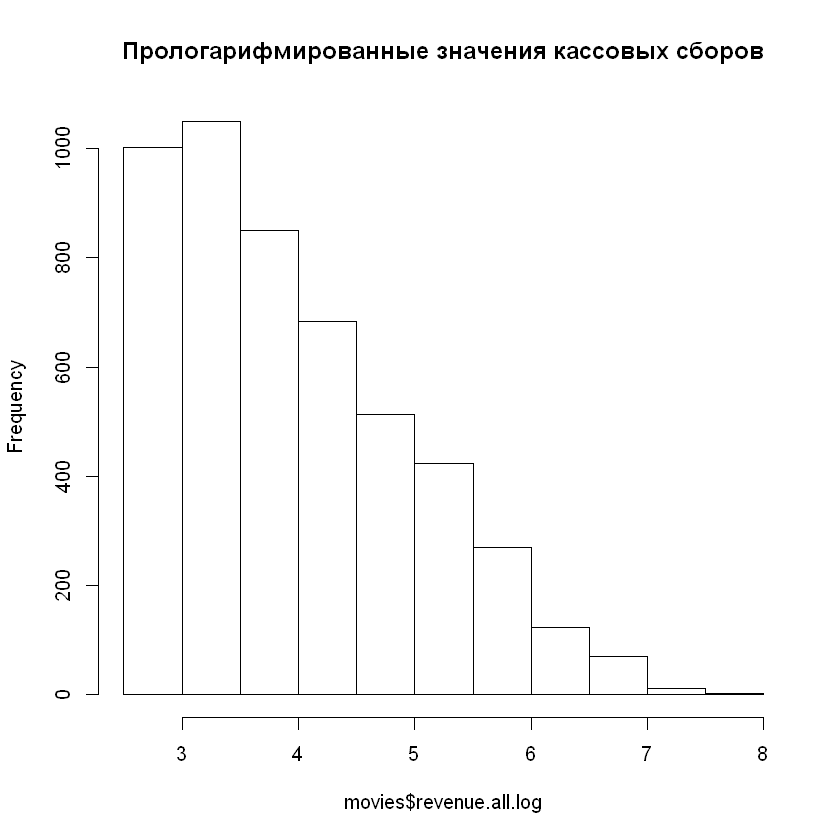

In [59]:
hist(movies$revenue.all.log, 
     main = "Прологарифмированные значения кассовых сборов")

Значения все еще слегка искажены, но они приняли более нормальное распределение.